# Final Project - ITM 454 FAQ Chatbot for AUPP Website


# 1. Load and Preview Chatbot Dataset

In [2]:
import pandas as pd
import json

file_path = 'dataset.json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df

,category,question,answer,alt_questions
0,Academic Policies,When can I take a leave of absence from AUPP?,You can request a Leave of Absence (LOA) for l...,"[How do I apply for a leave of absence?, Can I..."
1,Academic Policies,Who approves a leave of absence?,The authority to grant a Leave of Absence rest...,"[Who decides if I can take a leave?, Which off..."
2,Academic Policies,Where do I get the Leave of Absence form?,You can obtain the LOA Form from the Office of...,"[How can I get the LOA form?, Where do I pick ..."
3,Academic Policies,How long can I be on leave before I lose my st...,The specific duration of leave allowed is deta...,"[What is the maximum time I can be on leave?, ..."
4,Academic Policies,"Can I return after taking a leave of absence, ...","Yes, you can return after taking a leave of ab...","[How do I come back after a LOA?, Can I rejoin..."
...,...,...,...,...
432,Tuition Fees & Scholarships,What is the TOEFL ITP exam fee at AUPP?,The TOEFL ITP exam fee is USD 30.,"[How much is the TOEFL ITP exam fee?, Does AUP..."
433,Tuition Fees & Scholarships,What is the placement exam fee?,The placement exam costs USD 30.,"[How much is the placement exam fee?, Does AUP..."
434,Tuition Fees & Scholarships,Where can students pay tuition on campus?,Students can pay tuition directly at the AUPP ...,"[Where is tuition paid at AUPP?, Can tuition b..."
435,Tuition Fees & Scholarships,Can students pay tuition using ABA Bank?,Yes. Tuition can be paid via ABA mobile app or...,"[Can tuition be paid through ABA Bank?, Does A..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       437 non-null    object
 1   question       437 non-null    object
 2   answer         437 non-null    object
 3   alt_questions  437 non-null    object
dtypes: object(4)
memory usage: 13.8+ KB


In [4]:
df["category"].value_counts()

category
Academic Policies              144
University Leadership           79
Career/Faculty Info             70
Programs & Majors               48
Professional Programs           42
Tuition Fees & Scholarships     32
University Info                 22
Name: count, dtype: int64

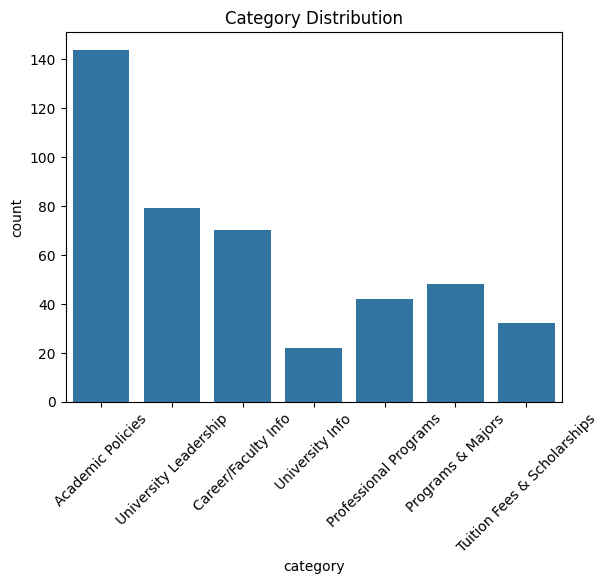

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='category')
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


## 2. Text Preprocessing and Cleaning Function

In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text, remove_stopwords=False):
    text = str(text).lower()                     # lowercase
    text = re.sub(r'\d+', '', text)             # remove numbers
    text = re.sub(r'[^\w\s]', '', text)         # remove punctuation
    text = text.strip()                          # remove leading/trailing spaces

    # Tokenize
    words = word_tokenize(text)

    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]

    if remove_stopwords:
        words = [word for word in words if word not in stop_words]

    return " ".join(words)

[nltk_data] Downloading package punkt to C:\Users\Laytong
[nltk_data]     Ly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Laytong
[nltk_data]     Ly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Laytong
[nltk_data]     Ly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Laytong
[nltk_data]     Ly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df["question_clean"] = df["question"].apply(lambda x: clean_text(x, remove_stopwords=True))

In [8]:
df

,category,question,answer,alt_questions,question_clean
0,Academic Policies,When can I take a leave of absence from AUPP?,You can request a Leave of Absence (LOA) for l...,"[How do I apply for a leave of absence?, Can I...",take leave absence aupp
1,Academic Policies,Who approves a leave of absence?,The authority to grant a Leave of Absence rest...,"[Who decides if I can take a leave?, Which off...",approves leave absence
2,Academic Policies,Where do I get the Leave of Absence form?,You can obtain the LOA Form from the Office of...,"[How can I get the LOA form?, Where do I pick ...",get leave absence form
3,Academic Policies,How long can I be on leave before I lose my st...,The specific duration of leave allowed is deta...,"[What is the maximum time I can be on leave?, ...",long leave lose student status
4,Academic Policies,"Can I return after taking a leave of absence, ...","Yes, you can return after taking a leave of ab...","[How do I come back after a LOA?, Can I rejoin...",return taking leave absence apply return
...,...,...,...,...,...
432,Tuition Fees & Scholarships,What is the TOEFL ITP exam fee at AUPP?,The TOEFL ITP exam fee is USD 30.,"[How much is the TOEFL ITP exam fee?, Does AUP...",toefl itp exam fee aupp
433,Tuition Fees & Scholarships,What is the placement exam fee?,The placement exam costs USD 30.,"[How much is the placement exam fee?, Does AUP...",placement exam fee
434,Tuition Fees & Scholarships,Where can students pay tuition on campus?,Students can pay tuition directly at the AUPP ...,"[Where is tuition paid at AUPP?, Can tuition b...",student pay tuition campus
435,Tuition Fees & Scholarships,Can students pay tuition using ABA Bank?,Yes. Tuition can be paid via ABA mobile app or...,"[Can tuition be paid through ABA Bank?, Does A...",student pay tuition using aba bank


In [9]:
rows = []
for idx, row in df.iterrows():
    # main question
    rows.append({
        "question": row['question_clean'],
        "category": row['category'],
        "answer": row['answer']
    })
    # alternative questions
    for alt in row['alt_questions']:
        rows.append({
            "question": alt,
            "category": row['category'],
            "answer": row['answer']
        })

df_expanded = pd.DataFrame(rows)


In [10]:
df_expanded

,question,category,answer
0,take leave absence aupp,Academic Policies,You can request a Leave of Absence (LOA) for l...
1,How do I apply for a leave of absence?,Academic Policies,You can request a Leave of Absence (LOA) for l...
2,Can I take time off from AUPP?,Academic Policies,You can request a Leave of Absence (LOA) for l...
3,What are the rules for requesting a LOA?,Academic Policies,You can request a Leave of Absence (LOA) for l...
4,When am I allowed to take a break from studies?,Academic Policies,You can request a Leave of Absence (LOA) for l...
...,...,...,...
2180,student pay using canadia bank,Tuition Fees & Scholarships,Yes. Payments can be made through the Canadia ...
2181,Can tuition be paid through Canadia Bank?,Tuition Fees & Scholarships,Yes. Payments can be made through the Canadia ...
2182,Does AUPP accept Canadia Bank payments?,Tuition Fees & Scholarships,Yes. Payments can be made through the Canadia ...
2183,Is Canadia Bank available for tuition payment?,Tuition Fees & Scholarships,Yes. Payments can be made through the Canadia ...


In [11]:
df_expanded["category"].value_counts()

category
Academic Policies              720
University Leadership          395
Career/Faculty Info            350
Programs & Majors              240
Professional Programs          210
Tuition Fees & Scholarships    160
University Info                110
Name: count, dtype: int64

## 3. Feature Selection and Data Splitting

In [12]:
X = df_expanded["question"]
y = df_expanded["category"]
answers = df_expanded["answer"]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, ans_train, ans_test = train_test_split(X, y, answers, test_size=0.3, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1529,)
(656,)
(1529,)
(656,)


## 4. Train TF-IDF + Logistic Regression Classifier

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

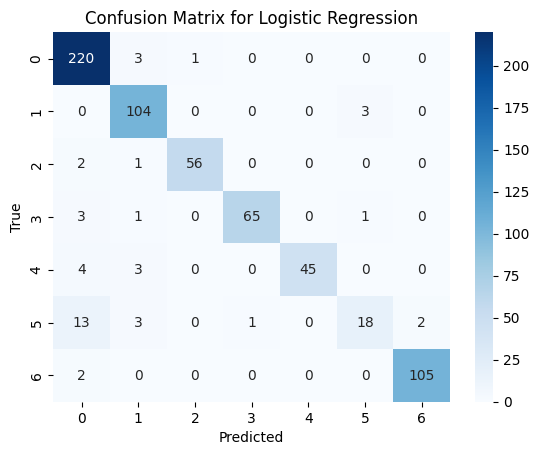


classification report for Logistic Regression: 

                             precision    recall  f1-score   support

          Academic Policies       0.90      0.98      0.94       224
        Career/Faculty Info       0.90      0.97      0.94       107
      Professional Programs       0.98      0.95      0.97        59
          Programs & Majors       0.98      0.93      0.96        70
Tuition Fees & Scholarships       1.00      0.87      0.93        52
            University Info       0.82      0.49      0.61        37
      University Leadership       0.98      0.98      0.98       107

                   accuracy                           0.93       656
                  macro avg       0.94      0.88      0.90       656
               weighted avg       0.93      0.93      0.93       656



In [16]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_lr = pipeline_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')

plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"\nclassification report for Logistic Regression: \n\n{classification_report(y_test, y_pred_lr)}")

## 5. Train TF-IDF + Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB

pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", max_features=5000,  ngram_range=(1, 2))),
     ('clf', MultinomialNB())
])

pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', MultinomialNB())])

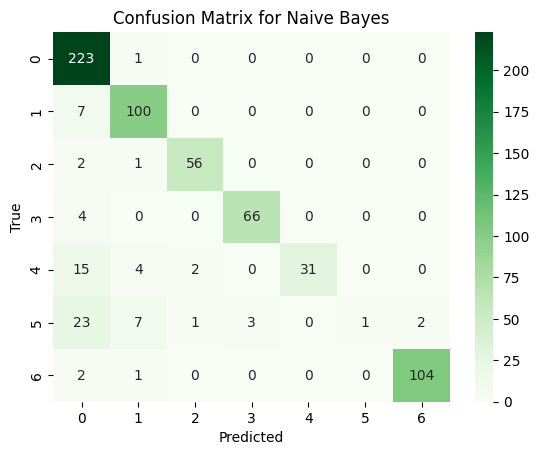


classification report for Naive Bayes: 

                             precision    recall  f1-score   support

          Academic Policies       0.81      1.00      0.89       224
        Career/Faculty Info       0.88      0.93      0.90       107
      Professional Programs       0.95      0.95      0.95        59
          Programs & Majors       0.96      0.94      0.95        70
Tuition Fees & Scholarships       1.00      0.60      0.75        52
            University Info       1.00      0.03      0.05        37
      University Leadership       0.98      0.97      0.98       107

                   accuracy                           0.89       656
                  macro avg       0.94      0.77      0.78       656
               weighted avg       0.90      0.89      0.86       656



In [18]:
y_pred_nb = pipeline_nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='d')

plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"\nclassification report for Naive Bayes: \n\n{classification_report(y_test, y_pred_nb)}")

## 6. Train TF-IDF + Random Forest Classifier


In [19]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", max_features=5000,  ngram_range=(1, 2))),
     ('clf', RandomForestClassifier())
])

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', RandomForestClassifier())])

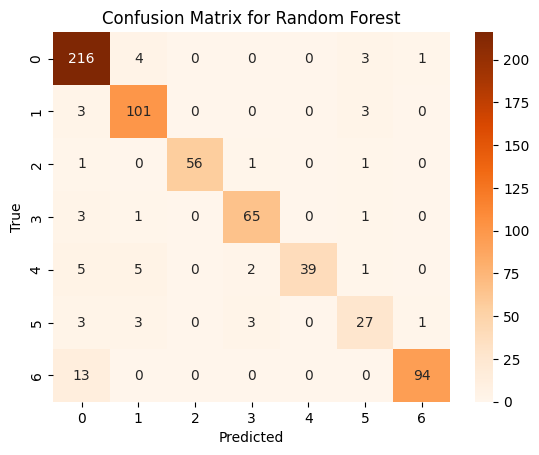


classification report for Random Forest: 

                             precision    recall  f1-score   support

          Academic Policies       0.89      0.96      0.92       224
        Career/Faculty Info       0.89      0.94      0.91       107
      Professional Programs       1.00      0.95      0.97        59
          Programs & Majors       0.92      0.93      0.92        70
Tuition Fees & Scholarships       1.00      0.75      0.86        52
            University Info       0.75      0.73      0.74        37
      University Leadership       0.98      0.88      0.93       107

                   accuracy                           0.91       656
                  macro avg       0.92      0.88      0.89       656
               weighted avg       0.92      0.91      0.91       656



In [20]:
y_pred_rf = pipeline_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='d')

plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"\nclassification report for Random Forest: \n\n{classification_report(y_test, y_pred_rf)}")

## 7. Train TF-IDF + Support Vector Machine Classifier


In [21]:
from sklearn.svm import LinearSVC

pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", max_features=5000,  ngram_range=(1, 2))),
     ('clf', LinearSVC())
])

pipeline_svm.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', LinearSVC())])

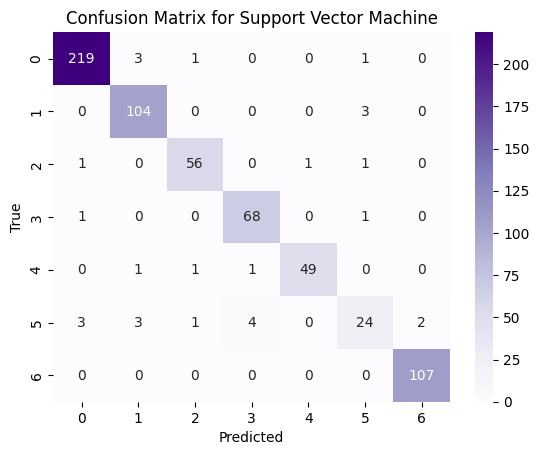


classification report for Support Vector Machine: 

                             precision    recall  f1-score   support

          Academic Policies       0.98      0.98      0.98       224
        Career/Faculty Info       0.94      0.97      0.95       107
      Professional Programs       0.95      0.95      0.95        59
          Programs & Majors       0.93      0.97      0.95        70
Tuition Fees & Scholarships       0.98      0.94      0.96        52
            University Info       0.80      0.65      0.72        37
      University Leadership       0.98      1.00      0.99       107

                   accuracy                           0.96       656
                  macro avg       0.94      0.92      0.93       656
               weighted avg       0.95      0.96      0.95       656



In [22]:
y_pred_svm = pipeline_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap="Purples", fmt='d')

plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"\nclassification report for Support Vector Machine: \n\n{classification_report(y_test, y_pred_svm)}")

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline_gb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", max_features=5000,  ngram_range=(1, 2))),
    ('clf', GradientBoostingClassifier())
])

pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', GradientBoostingClassifier())])

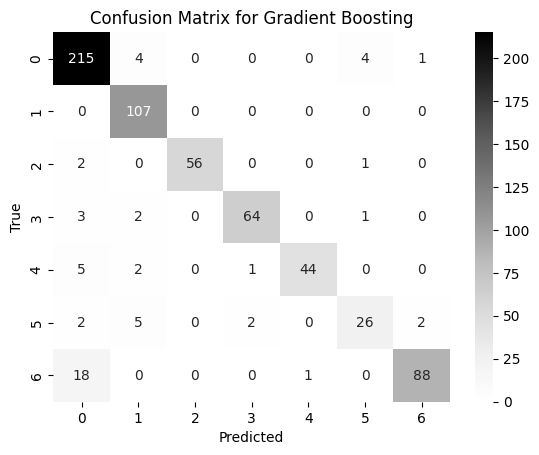


classification report for Gradient Boosting: 

                             precision    recall  f1-score   support

          Academic Policies       0.88      0.96      0.92       224
        Career/Faculty Info       0.89      1.00      0.94       107
      Professional Programs       1.00      0.95      0.97        59
          Programs & Majors       0.96      0.91      0.93        70
Tuition Fees & Scholarships       0.98      0.85      0.91        52
            University Info       0.81      0.70      0.75        37
      University Leadership       0.97      0.82      0.89       107

                   accuracy                           0.91       656
                  macro avg       0.93      0.88      0.90       656
               weighted avg       0.92      0.91      0.91       656



In [24]:
y_pred_gb = pipeline_gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, cmap="Greys", fmt='d')

plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"\nclassification report for Gradient Boosting: \n\n{classification_report(y_test, y_pred_gb)}")

## 7. Model Comparison

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

models = {
    "Logistic Regression": pipeline_lr,
    "Gradient Boosting": pipeline_gb,
    "Random Forest": pipeline_rf,
    "SVM": pipeline_svm,
    "Naive Bayes": pipeline_nb
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro', zero_division=True)
    recall = recall_score(y_test, y_pred, average='macro')
    results.append(
        {"Model": name,
         "Accuracy": acc,
         "Macro F1": macro_f1,
         "Precision": precision,
         "Recall": recall
         })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="Macro F1", ascending=False)

In [26]:
df_results

,Model,Accuracy,Macro F1,Precision,Recall
3,SVM,0.955793,0.928564,0.936704,0.923026
0,Logistic Regression,0.934451,0.902546,0.938969,0.880716
1,Gradient Boosting,0.914634,0.902503,0.925965,0.884935
2,Random Forest,0.911585,0.893711,0.916553,0.877738
4,Naive Bayes,0.885671,0.781702,0.938853,0.773895


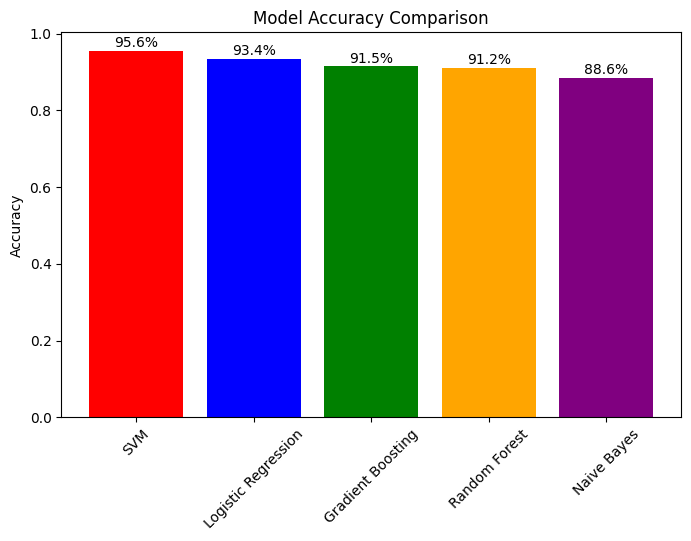

In [27]:
models = df_results["Model"]
accuracies = df_results["Accuracy"]

plt.figure(figsize=(8, 5))

colors = ["red", "blue", "green", "orange", "purple", "brown"]

plt.bar(models, accuracies, color=colors[:len(models)])

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc*100:.1f}%", ha="center")

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

## The SVM model performs the best among all models, achieving the highest accuracy at **96.3%**, indicating it is the most effective classifier in this comparison.


# 8. Save SVM Model

In [28]:
import joblib

joblib.dump(pipeline_svm, "pipeline_svm.joblib")
print("Model Saved Succesfully!")

Model Saved Succesfully!


## 9. Generate SBERT Embeddings for Questions

In [29]:
from sentence_transformers import SentenceTransformer
import numpy as np
import joblib

sbert = SentenceTransformer("all-MiniLM-L6-v2")

df_expanded["embedding"] = df_expanded["question"].apply(lambda x: sbert.encode(x))

D:\American University of Phnom Penh\Fall 2025\ITM 454 Natural Language Processing\Final Project\final-project-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
joblib.dump(df_expanded, "faq_with_embeddings.joblib")
print("SBERT FAQ Embeddings Saved Succesfully!")

SBERT FAQ Embeddings Saved Succesfully!


## 10. Sample Testing ChatBot

In [31]:
import numpy as np
import joblib
from sentence_transformers import SentenceTransformer

# Load saved models
pipeline = joblib.load("pipeline_svm.joblib")          # Category classifier
df_faq = joblib.load("faq_with_embeddings.joblib") # FAQ with embeddings
sbert = SentenceTransformer("all-MiniLM-L6-v2")   # SBERT model

def get_answer(user_input):
    # Step 1: Predict category
    pred_category = pipeline.predict([user_input])[0]

    # Step 2: Filter FAQs by predicted category
    df_cat = df_faq[df_faq['category'] == pred_category]

    # Step 3: Encode user input
    query_emb = sbert.encode(user_input)

    # Step 4: Compute cosine similarity within the category
    embeddings = np.vstack(df_cat['embedding'].values)
    cosine_sim = embeddings @ query_emb / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(query_emb))

    # Step 5: Pick the most similar question
    idx = np.argmax(cosine_sim)
    faq_row = df_cat.iloc[idx]

    return faq_row['category'], faq_row['answer']

# Chat loop
print("Welcome to Hybrid AUPP FAQ Chatbot! Type 'exit' to quit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break

    category, answer = get_answer(user_input)
    print(f"Chatbot ({category}): {answer}\n")


Welcome to Hybrid AUPP FAQ Chatbot! Type 'exit' to quit.


You:  Tell me the scholarship available at AUPP


Chatbot (Tuition Fees & Scholarships): Yes. Scholarships are awarded based on National Examination results. Merit scholarships are for Grade A or B students. Full scholarships are for Grade A students with financial need.



You:  where is AUPP


Chatbot (University Info): The address of AUPP is #278H, Street 201R, Kroalkor Village, Sangkat Kilometer 6, Khan Russey Keo, Phnom Penh, Cambodia.



You:  exit


Chatbot: Goodbye!
